# Exercise 1
Due date: 2022-01-31

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"01_Classification_Goup42_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or google form (LPC).

In [1]:
group_name = "1"
group_members = ["Pinheiro", 
         "Macedo"]

**Chapter 3 – Classification**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/01_Classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# MNIST

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
# X is a pandas dataframe
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(70000, 784)


In [6]:
y.shape

(70000,)

In [7]:
# the images are 28x28 pixels
28 * 28

784

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

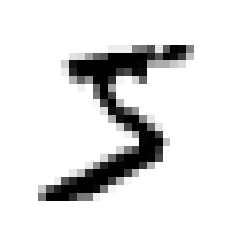

In [9]:
%matplotlib inline

# to get the values of the dataframe X, call X.values.
# X.values[0] gives the pixel values for the first image
plot_digit(X.values[0])

In [10]:
# the label of the first image.
# note that it's a string and not an int
y[0]

'5'

In [11]:
y = y.astype(np.uint8)

In [12]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

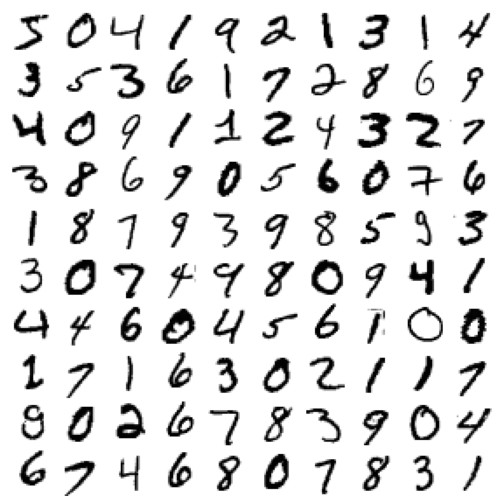

In [13]:
plt.figure(figsize=(9,9))
example_images = X[:100].values
plot_digits(example_images, images_per_row=10)
plt.show()

In [14]:
# note it is an int now
y[0]

5

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary classifier
Let's train a classifier to predict the digit is a 5 or not.

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Task 1: SGD Classifier
1) Create an [SGD Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) `sgd_clf` with the following hyperparameters:  `max_iter=1000`, `tol=1e-3`, `random_state=42`  
2) Fit the classifier by calling its `fit` function with `X_train` and `y_train_5` as the parameters. This might take a while.

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [19]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [20]:
# fit the sgd_clf

In [21]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

In [22]:
# let's test the model on an example. Feel free to play around and try more.

In [23]:
sgd_clf.predict(X_test[0:1])

array([False])

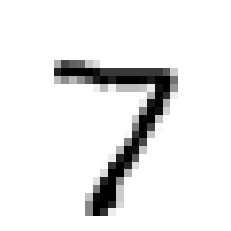

In [24]:
plot_digit(X_test[0:1].values)

## Task 2: Cross Validation of SGD Classifier

1) Calculate the [cross-validation score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) of the `sgd_clf` classifier with the train data. Use `cv=3` and `scoring="accuracy"`.    

2) a) Explain what cross validation is.

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [27]:
# cross val score 
score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(score)

[0.95035 0.96035 0.9604 ]


In [28]:
task2a_explanation = " Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. Let's take an example. You can split your train set into five subsets calculating the scoring of validation of the model five times, each one using a diferent subset as the validation set."

In [29]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

Here is some code for a [stratified k-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

2) b) Explain stratified cross validation

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.values[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.values[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [31]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [32]:
task2b_explanation = "In the stratified cross validation, the folds are made by preserving the percentage of samples for each class"

In [33]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

# Never 5 Classifier
This classifier always predicts 0

In [34]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [35]:
print(X_train)

       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59999     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0

[60

In [36]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Task 3
Explain why the "never 5 classifier" still has such "high" scores.

In [37]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [38]:
task3_explanation = "never_5_clf has high scores because just ~10% of numbers are 5, so this classifier is right in about ~90% of the cases."

In [39]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

Back to the real classifier: `sgd_clf`

In [40]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## Task 4
Calculate the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for 
- the train and predicted values 
- the train and perfect predictions 

Explain what the entries of the confusion matrix mean.

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

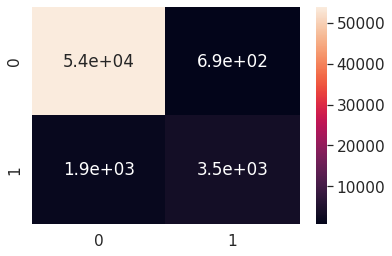

In [43]:
# confusion matrix for predicted values
import seaborn as sns
confu_matrix = confusion_matrix(y_train_5, y_train_pred)
sns.set( font_scale = 1.4 )
sns.heatmap( confu_matrix, annot = True )

In [44]:
# confusion matrix for perfect predictions
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [45]:
task4_explanation = " Let's analyze the confusion matrix for predicted values: The first line consider the not-5: 53,892 were classified correctly as not-5 (true negatives) and 687 were wrong classified as 5 (false positives). The second line consider the 5: 1,891 were wrong classified as not-5 (false negatives) and 3,530 were correctly classified as 5 (true positives)."

In [46]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 5
Calculate precision and recall scores for training and predicted values

In [47]:
from sklearn.metrics import precision_score, recall_score

In [48]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [49]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [50]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [51]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 6
Using the values from the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), calculate 
- the rate of false positives, true positives, false negatives, true negatives 
- accuracy 
- precision 

In [52]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [53]:
tn, fp, fn, tp = confusion_matrix(y_train_5, y_train_pred).ravel()

In [54]:
#rate of true negatives
tn/len(y_train_5)

0.8982

In [55]:
#rate of false negatives
fn/len(y_train_5)

0.031516666666666665

In [56]:
#rate of true positives
tp/len(y_train_5)

0.058833333333333335

In [57]:
#rate of false positives
fp/len(y_train_5)

0.01145

In [58]:
#accuracy
(tp+tn)/len(y_train_5)

0.9570333333333333

In [59]:
#precision
tp/(tp+fp)

0.8370879772350012

In [60]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 7
Calculate the f1 score. 

In [61]:
from sklearn.metrics import f1_score

In [62]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [63]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [64]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

## Task 8
Explain what the scores in task 5 and 6 (accuracy, precision, f1) describe.

In [65]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [66]:
task8_explanation = " "

In [67]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

# Setting a Threshold on the Prediction

In [68]:
# if you want to train sgd_clf again or had troubles with it
# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# sgd_clf.fit(X_train,y_train_5)

In [69]:
some_digit = X_train.iloc[0]

In [70]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2164.22030239])

In [71]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [72]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [73]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [74]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [75]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

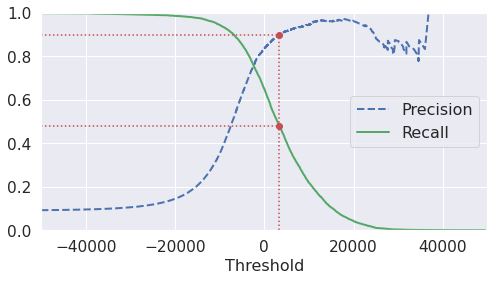

In [76]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

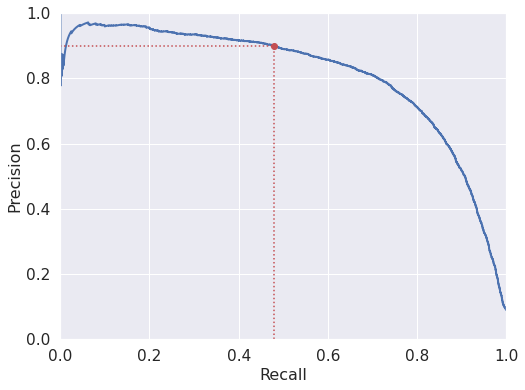

In [77]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [78]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [79]:
threshold_90_precision

3370.019499143958

In [80]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [81]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [82]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# ROC curves

We can now go on to calculate the [Receiver Operating Characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). 
For a good explanation see also [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).

Basically instead of plotting measures like precision and recall as a function of the threshold, we plot the true positive rate (recall) vs the false positive rate (fall-out).

In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

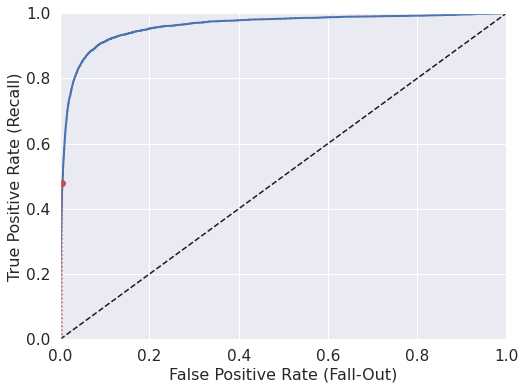

In [84]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

The area under the curve (auc) is a measure of how good the model is.

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Let's compare the SGD model with a random forest.

In [86]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [87]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

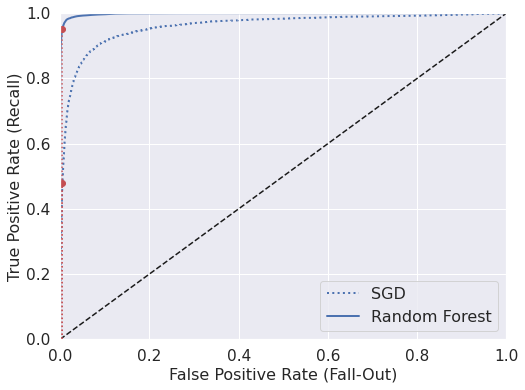

In [88]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [89]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [90]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [91]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Textbook exercises

**Exercise 1**

Feel free to play around with this question.
Try to build a different classifier. 

__Hint__: the KNeighborsClassifier works quite well for this task. Good hyperparameters are `{'n_neighbors': 4, 'weights': 'distance'}`

In [92]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [93]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

LGBM_5_clf = LGBMClassifier( boosting_type='gbdt', objective='binary' )
LGBM_5_clf.fit( X_train, y_train_5 )

LGBMClassifier(objective='binary')

In [94]:
y_train_pred_LGBM = LGBM_5_clf.predict_proba(X_test)

In [95]:
prec_test_LGBM, rec_test_LGBM, thresh_test_LGBM = precision_recall_curve(y_test_5, y_train_pred_LGBM[:,1])
bidx_test_LGBM = np.argmax(prec_test_LGBM * rec_test_LGBM)
best_cut_test_LGBM = thresh_test_LGBM[bidx_test_LGBM]
preds_test_LGBM = y_train_pred_LGBM[:,1] >= best_cut_test_LGBM

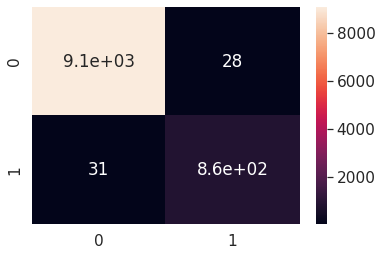

In [96]:
confu_matrix_LGBM = confusion_matrix(y_test_5, preds_test_LGBM)
tn_LGBM, fp_LGBM, fn_LGBM, tp_LGBM = confusion_matrix(y_test_5, preds_test_LGBM).ravel()
sns.set( font_scale = 1.4 )
sns.heatmap( confu_matrix_LGBM, annot = True )

In [97]:
precision_score_LGBM = precision_score(y_test_5, preds_test_LGBM)
recall_score_LGBM = recall_score(y_test_5, preds_test_LGBM)
f1_score_LGBM = f1_score(y_test_5, preds_test_LGBM)

<Figure size 576x432 with 0 Axes>

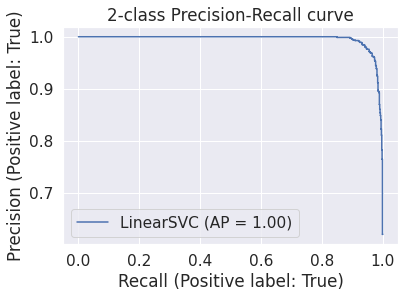

In [98]:
from sklearn.metrics import PrecisionRecallDisplay
plt.figure(figsize=(8, 6))
display = PrecisionRecallDisplay.from_estimator(
    LGBM_5_clf, X_test, y_test_5, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [99]:
fpr_LGBM, tpr_LGBM, thresholds_ = roc_curve(y_train_5, y_scores)

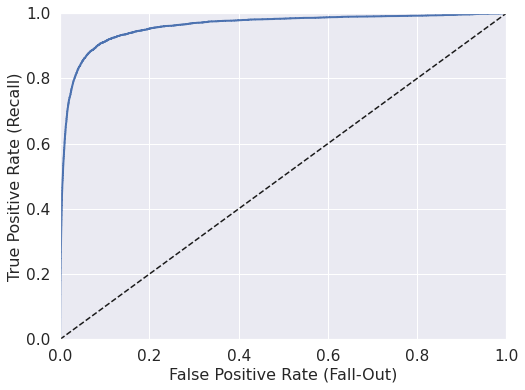

In [100]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_LGBM, tpr_LGBM)
plt.show()

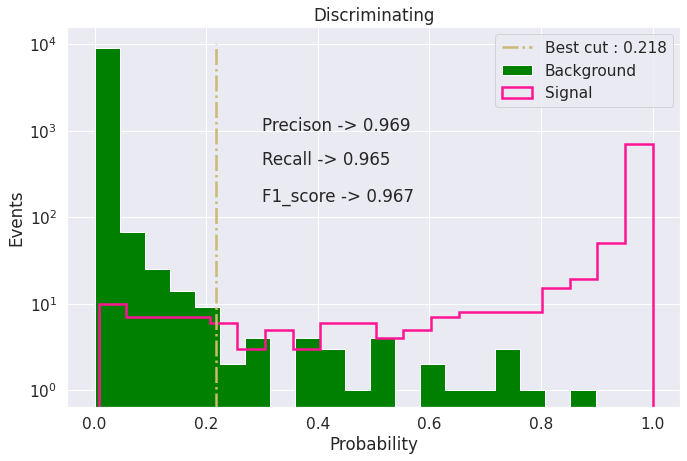

In [101]:
plt.figure(figsize=(11,7))
plt.hist(y_train_pred_LGBM[:,1][y_test_5 == 0], color = 'green', histtype='stepfilled', bins = 20, label = 'Background' )
plt.hist(y_train_pred_LGBM[:,1][y_test_5 == 1], color = 'deeppink', linewidth=2.5,  histtype = 'step', bins = 20, label = 'Signal' )
plt.plot( [best_cut_test_LGBM,best_cut_test_LGBM],[0,10e3],  "-.y", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut_test_LGBM ) ) 
plt.xlabel('Probability')
plt.ylabel('Events')
plt.title('Discriminating')
plt.yscale('log')
plt.text(0.3, 10e2, 'Precison -> {:2.3f}'.format(precision_score_LGBM))
plt.text(0.3, 40e1, 'Recall -> {:2.3f}'.format(recall_score_LGBM))
plt.text(0.3, 15e1, 'F1_score -> {:2.3f}'.format(f1_score_LGBM))
plt.legend(loc = 'best')

In [102]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

**Exercise 2**
(Optional)

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by five pixels. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [103]:
# your code goes below
# ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [104]:
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
# your code goes above this

# Exercise 2 Solution

In [105]:
from scipy.ndimage.interpolation import shift

In [106]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

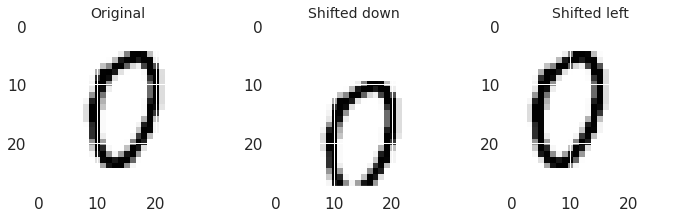

In [107]:
image = np.array(X_train)[1000]
shifted_image_down = shift_image( image,  0, 5)
shifted_image_left = shift_image( image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [108]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [109]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [110]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [112]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,2,4,5]}

In [113]:
grid_search = GridSearchCV( knn_clf, param_grid, scoring='roc_auc', cv = 2)

In [114]:
grid_search.fit(X_train_augmented, y_train_augmented)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 4, 5]}, scoring='roc_auc')

In [115]:
grid_search.best_params_

{'n_neighbors': 1}

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
y_pred = grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [118]:
accuracy_score(y_test, y_pred)

0.9727